In [2]:
# Please add data file before running code. I have not added data file in this folder due to size limit exceed error in google form
# Step 1: Importing Packages
import os
import cv2
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Step 2: Importing data from given folder
test_sports_dir = "data/test/sports"
test_conditioning_dir = "data/test/conditioning exercise"
train_sports_dir = "data/train/sports"
train_conditioning_dir = "data/train/conditioning exercise"


In [4]:
# Step 3: Resizing and processing data
test_sports_images = []
for filename in os.listdir(test_sports_dir):
    img = cv2.imread(os.path.join(test_sports_dir, filename))
    img = cv2.resize(img, (100, 100))
    test_sports_images.append(img)

test_conditioning_images = []
for filename in os.listdir(test_conditioning_dir):
    img = cv2.imread(os.path.join(test_conditioning_dir, filename))
    img = cv2.resize(img, (100, 100))
    test_conditioning_images.append(img)
    
train_sports_images = []
for filename in os.listdir(train_sports_dir):
    img = cv2.imread(os.path.join(train_sports_dir, filename))
    img = cv2.resize(img, (100, 100))
    train_sports_images.append(img)
    
train_conditioning_images = []
for filename in os.listdir(train_conditioning_dir):
    img = cv2.imread(os.path.join(train_conditioning_dir, filename))
    img = cv2.resize(img, (100, 100))
    train_conditioning_images.append(img)

X_test = np.concatenate((test_sports_images, test_conditioning_images), axis=0)
y_test = np.concatenate((np.ones(len(test_sports_images)), np.zeros(len(test_conditioning_images))), axis=0)

X_train = np.concatenate((train_sports_images, train_conditioning_images), axis=0)
y_train = np.concatenate((np.ones(len(train_sports_images)), np.zeros(len(train_conditioning_images))), axis=0)



In [5]:
# Step 4: Printing Number of data
print("Number of test data in sports folder:", len(test_sports_images))
print("Number of test data in conditioning folder:", len(test_conditioning_images))
print("Number of train data in sports folder:", len(train_sports_images))
print("Number of train data in conditioning folder:", len(train_conditioning_images))

Number of test data in sports folder: 690
Number of test data in conditioning folder: 337
Number of train data in sports folder: 2760
Number of train data in conditioning folder: 1345


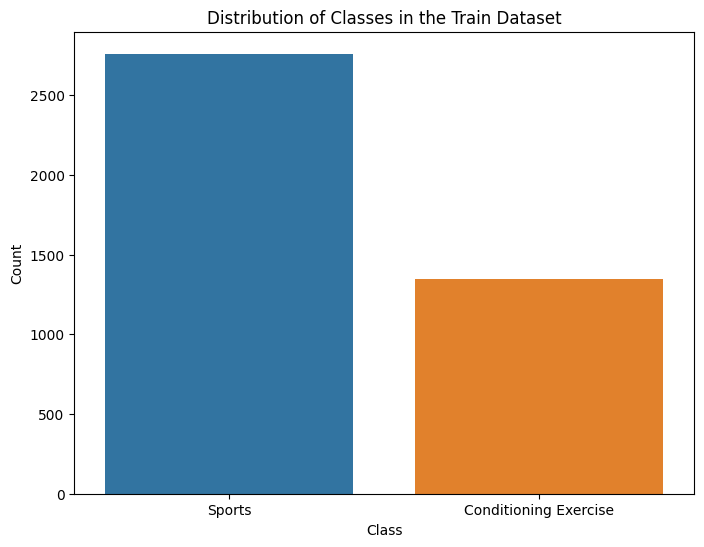

In [6]:
# Step 5: Visulaizing number of data through graph
sports_count = len(train_sports_images)
cond_exer_count = len(train_conditioning_images)

plt.figure(figsize=(8,6))
sns.barplot(x=['Sports', 'Conditioning Exercise'], y=[sports_count, cond_exer_count])
plt.title('Distribution of Classes in the Train Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Train Sports Image


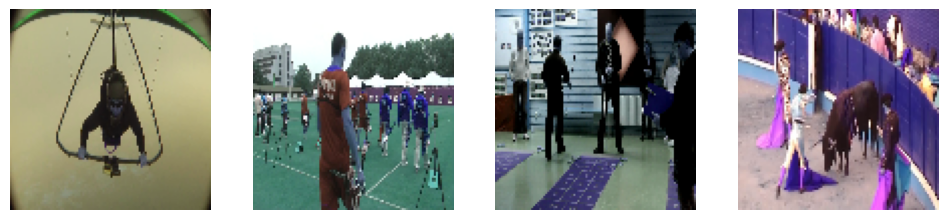

Train Conditioning Image


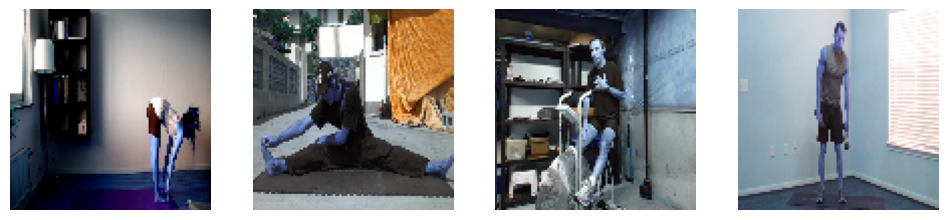

In [7]:
# Step6: Visulaizing the data after resizing it.
plt.figure(figsize=(12,12))
Number_of_image_visualizing = 4
print("Train Sports Image")
sports_imgs = train_sports_images[:Number_of_image_visualizing]
for i in range(Number_of_image_visualizing):
    plt.subplot(4,4,i+1)
    plt.imshow(sports_imgs[i])
    plt.axis('off')
    
plt.show()

plt.figure(figsize=(12,12))
print("Train Conditioning Image")
conditioning_imgs = train_conditioning_images[:Number_of_image_visualizing]
for j in range(Number_of_image_visualizing):
    plt.subplot(4,4,j+1)
    plt.imshow(conditioning_imgs[j])
    plt.axis('off')
    
plt.show()

In [8]:
# Step 7: Build the classification model
pca = PCA(n_components=100)
svc = SVC(kernel='rbf', C=10, gamma=0.001)
model = Pipeline([('pca', pca), ('svc', svc)])


In [9]:
# Step 8: Train the model
model.fit(X_train.reshape(X_train.shape[0], -1), y_train)


Pipeline(steps=[('pca', PCA(n_components=100)),
                ('svc', SVC(C=10, gamma=0.001))])

In [10]:
# Step 9: Evaluate the performance of the model
y_pred = model.predict(X_test.reshape(X_test.shape[0], -1))
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6718597857838364
